<a href="https://colab.research.google.com/github/urfa10/MSIB_Data-Science/blob/main/MSIB_Mortality_rate_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding

Objective : Menemukan Cluster dari data untuk melihat potensi angka rate mortality. Hal ini deperlukan untuk menentukan langkah strategis untuk mengurangi / menurunkan mortality rate


pemodelan - clustering- unsupervised Learning

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Understanding

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Data
path='/content/drive/MyDrive/Colab Notebooks/DataSource/data_mortality_rate.xlsx'
#Load data from drive
load_data_mr = pd.read_excel(path)
#membentuk data frame
df=pd.DataFrame(load_data_mr)
df

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.00,3281.0,849.62,0.00,849.62,0.0,273.8,280.6,740.0
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.00,3093.0,767.07,76.00,767.07,0.0,273.8,243.2,734.0
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.00,2908.0,519.69,24.00,519.69,0.0,268.1,214.1,722.0
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.00,2787.0,828.39,81.00,828.39,0.0,264.0,225.6,737.0
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.00,2631.0,555.81,0.00,555.81,0.0,239.1,183.4,779.0
5,1995,December,31,10,261.1,71.0,4.50,826.0,411.1,689.7,0.00,2493.0,1351.00,99.00,1351.00,0.0,232.3,203.7,800.0
6,1996,December,31,10,253.5,71.0,4.90,851.0,400.5,692.7,0.00,2344.0,1197.35,45.00,1197.35,0.0,227.5,79.5,718.0
7,1997,December,31,10,213.9,59.0,5.19,844.0,389.5,695.6,0.00,2262.0,933.24,98.00,933.24,0.0,223.7,93.6,833.0
8,1998,December,31,10,186.4,50.3,5.47,854.0,378.3,698.4,0.00,2116.0,441.63,150.00,441.63,0.0,220.2,92.7,827.0
9,1999,December,31,10,181.1,50.0,5.54,855.0,366.3,702.3,0.00,2041.0,2665.00,371.00,2665.00,0.0,136.0,76.4,814.0


## Pemodelan Cluster

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs


In [ ]:
x=df[['Crude Birth Ratio',	'Crude Death Ratio',	'HIV Prevalence',	'Immunization Measless',	'Infant Mortality Rate',	'Life expentancy rate',	'Malaria Prevalence',	'Maternal Mortality Rate',	'Nurse Density', 'Pharmaceutical',	'Physi density',	'TB Prevalence',	'Undernourish Population',	'Underweight Children',	'immunization DPT']]
#Karena unsupervised learning tidak ada variabel target

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

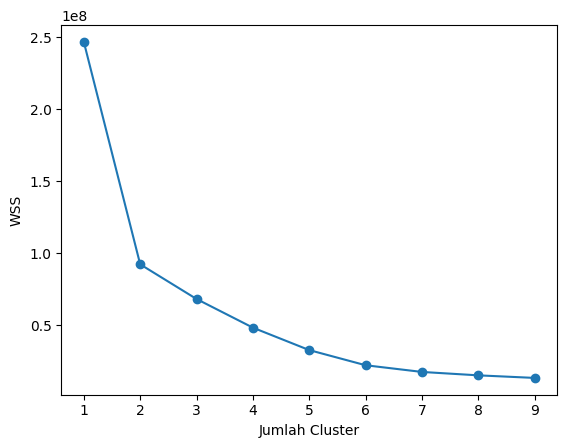

In [ ]:
cluster_range=range(1,10)

cluster_wss=[]

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range,cluster_wss, marker='o')
plt.show()

Cluster 3 sd 5

In [ ]:
#Menetukan kongfigurasi KMeans pada model
cls=KMeans(n_clusters=4,random_state=0)
#Membentuk Model
model_cls=cls.fit(x)
df['cluster']=model_cls.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.head()

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT,cluster
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.0,3281.0,849.62,0.0,849.62,0.0,273.8,280.6,740.0,0
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.0,3093.0,767.07,76.0,767.07,0.0,273.8,243.2,734.0,0
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.0,2908.0,519.69,24.0,519.69,0.0,268.1,214.1,722.0,0
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.0,2787.0,828.39,81.0,828.39,0.0,264.0,225.6,737.0,0
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.0,2631.0,555.81,0.0,555.81,0.0,239.1,183.4,779.0,0


In [ ]:
from google.colab import files
#Menimpan File/Export File to Local computer output CSV file
df.to_excel('df_cluster_mr.xlsx')
files.download('df_cluster_mr.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>